In [31]:
import pandas as pd #reading in csv
import seaborn as sns #vis
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import geopy #for mapping longitude,latitude
from geopy.geocoders import Nominatim

import json


# Info
y: accidents_2017.csv
air_qualityNov2017.csv
immigrantsbynation
population
unemployment

other sources?
weather, alcohol consumption

Min: ~5000

Preidct or by hour BY DAY (or by afternoon, morning, night) whether or not accidents will be greater than normal or less than normal 

 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', Sants-Montjuic, 'Sarrià-Sant Gervasi

X: Datetime
Features: Part of Day, Air quality, District Name, Unemployment Rate,
Features (Maybe): Population, Bus stops 
Y: # of accidents

Barcelona - Poblenou --> Sants Marti YES

Barcelona - Sants --> Sants Monjuic YES

Barcelona - Eixample --> Eixample YES

Barcelona - Gracia --> Gracia YES

Barcelona - Eixample --> Eixample YES

Barcelona - Ciutadella  --> Ciuta Della YES

Barcelona - Palau Reial --> Les Corts YES

In [32]:
acc = pd.read_csv('barcelona-data-sets/accidents_2017.csv')


In [33]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [34]:
#acc['District Name']
acc['Part of the day'].value_counts()

Afternoon    5082
Morning      4067
Night        1190
Name: Part of the day, dtype: int64

In [35]:
def render_json(loc):
    #prettifies json from input location from geopy
    output = json.dumps(loc.raw, indent=2)
    line_list = output.split("\n")  # Sort of line replacing "\n" with a new line
    # Now that our obj is a list of strings leverage print's automatic newline
    for line in line_list:
        print(line)
    

In [36]:
def find_loc(long,lat):
    geolocator = Nominatim()
    loc = geolocator.reverse(lat,long) #(latitude, longitude) from unemployment or accidents
    print(loc.raw["address"])

# EDA

In [37]:
acc['District Name'].value_counts()

Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

Ciutat Vella = 600

'Eixample', = 3029

'Gràcia', = 531

'Horta-Guinardó', = 743

'Les Corts', = 726

'Nou Barris', = 542

'Sant Andreu', = 597

'Sant Martí', = 1136

 Sants-Montjuic, = 1104
 
'Sarrià-Sant Gervasi = 1104

Unknown = 27

Found using len(acc.loc[acc['District Name'] == 'Ciutat Vella' ])

In [38]:
len(acc.loc[acc['District Name'] == 'Eixample' ])

3029

In [39]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Converting Dates to Dataframe (Test)

In [40]:
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Month'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

In [41]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [42]:
acc['Datetime'].head()

0   2017-10-13 08:00:00
1   2017-09-01 13:00:00
2   2017-12-08 21:00:00
3   2017-07-21 02:00:00
4   2017-05-25 14:00:00
Name: Datetime, dtype: datetime64[ns]

In [43]:
#acc.drop(columns=['Month','Day','Hour','Street','Neighborhood Name']).to_csv('acc_datetime.csv')

In [44]:
#acc = acc.set_index('Datetime')
#acc.index

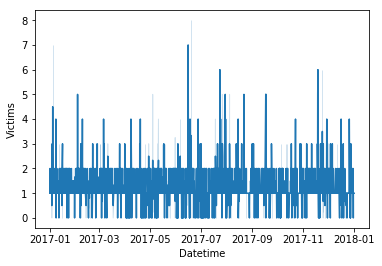

In [45]:
#ax = sns.lineplot(x="Datetime", y="Victims", hue='District Name', data=acc)
ax = sns.lineplot(x='Datetime', y="Victims", data=acc.loc[acc['District Name'] == 'Eixample' ])

In [46]:
#DO IT BY DAY 
acc.index.value_counts()
#acc.loc['2017-01-01':'2017-01-02']


2047    1
7545    1
9558    1
3411    1
1362    1
7505    1
5456    1
9550    1
3403    1
1354    1
7497    1
5448    1
9542    1
3395    1
1346    1
7489    1
5440    1
9534    1
3387    1
5464    1
7513    1
1370    1
1386    1
9590    1
3443    1
1394    1
7537    1
5488    1
9582    1
3435    1
       ..
2692    1
2708    1
8833    1
4735    1
6782    1
637     1
2684    1
8825    1
4727    1
8849    1
661     1
8881    1
677     1
4783    1
6830    1
685     1
2732    1
8873    1
4775    1
6822    1
2724    1
6806    1
8865    1
4767    1
6814    1
669     1
2716    1
8857    1
4759    1
0       1
Length: 10339, dtype: int64

In [47]:
acc.loc['2017-1-1 01:00:00':'2017-1-2 01:00:00']


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime


In [48]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


# Air Quality

Generated all during November 2017

In [49]:
#read airquality
AQ = pd.read_csv('barcelona-data-sets/air_quality_Nov2017.csv')

In [50]:
AQ.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [51]:
#find which district these stations lie in
AQ.loc[AQ['Station'] == 'Barcelona - Palau Reial' ]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
13,Barcelona - Palau Reial,Good,2.1151,41.3875,0h,Good,27.0,0h,Good,38.0,1h,Good,24.0,01/11/2018 1:00,1541030725
21,Barcelona - Palau Reial,Good,2.1151,41.3875,1h,Good,34.0,1h,Good,28.0,2h,Good,24.0,01/11/2018 2:00,1541034303
29,Barcelona - Palau Reial,Good,2.1151,41.3875,2h,Good,38.0,2h,Good,19.0,3h,Good,24.0,01/11/2018 3:00,1541037902
37,Barcelona - Palau Reial,Good,2.1151,41.3875,3h,Good,57.0,3h,Good,7.0,4h,Good,23.0,01/11/2018 4:00,1541041503
45,Barcelona - Palau Reial,Good,2.1151,41.3875,4h,Good,48.0,4h,Good,8.0,5h,Good,21.0,01/11/2018 5:00,1541045102
53,Barcelona - Palau Reial,Good,2.1151,41.3875,5h,Good,41.0,5h,Good,11.0,6h,Good,17.0,01/11/2018 6:00,1541048703
61,Barcelona - Palau Reial,Good,2.1151,41.3875,6h,Good,28.0,6h,Good,17.0,7h,Good,15.0,01/11/2018 7:00,1541052302
69,Barcelona - Palau Reial,Good,2.1151,41.3875,7h,Good,10.0,7h,Good,34.0,8h,Good,13.0,01/11/2018 8:00,1541055903
77,Barcelona - Palau Reial,Good,2.1151,41.3875,8h,Good,7.0,8h,Good,36.0,9h,Good,12.0,01/11/2018 9:00,1541059503


In [52]:
AQ['Station'].value_counts()

Barcelona - Palau Reial     718
Barcelona - Eixample        718
Barcelona - Sants           718
Barcelona - Poblenou        718
Barcelona - Observ Fabra    718
Barcelona - Gràcia          718
Barcelona - Ciutadella      718
Barcelona - Vall Hebron     718
Name: Station, dtype: int64

In [53]:
AQ['Generated'].value_counts()

15/11/2018 12:00    16
02/11/2018 12:00    16
15/11/2018 14:00    16
15/11/2018 18:00    16
08/11/2018 19:00     8
18/11/2018 0:00      8
05/11/2018 18:00     8
03/11/2018 15:00     8
19/11/2018 8:00      8
22/11/2018 0:00      8
06/11/2018 18:00     8
22/11/2018 11:00     8
25/11/2018 21:00     8
11/11/2018 4:00      8
25/11/2018 11:00     8
08/11/2018 20:00     8
19/11/2018 0:00      8
02/11/2018 21:00     8
20/11/2018 16:00     8
01/11/2018 20:00     8
27/11/2018 18:00     8
06/11/2018 7:00      8
29/11/2018 21:00     8
14/11/2018 23:00     8
29/11/2018 18:00     8
12/11/2018 21:00     8
28/11/2018 2:00      8
23/11/2018 7:00      8
29/11/2018 22:00     8
04/11/2018 16:00     8
                    ..
29/11/2018 7:00      8
24/11/2018 9:00      8
03/11/2018 4:00      8
09/11/2018 7:00      8
06/11/2018 10:00     8
21/11/2018 4:00      8
05/11/2018 16:00     8
04/11/2018 11:00     8
12/11/2018 11:00     8
19/11/2018 4:00      8
11/11/2018 13:00     8
28/11/2018 18:00     8
20/11/2018 

In [54]:
# convert generated to pandas datetime

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Month'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

In [55]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
Station         5744 non-null object
Air Quality     5744 non-null object
Longitude       5744 non-null float64
Latitude        5744 non-null float64
O3 Hour         4268 non-null object
O3 Quality      4268 non-null object
O3 Value        4101 non-null float64
NO2 Hour        5689 non-null object
NO2 Quality     5689 non-null object
NO2 Value       5460 non-null float64
PM10 Hour       3722 non-null object
PM10 Quality    3722 non-null object
PM10 Value      3647 non-null float64
Generated       5744 non-null object
Date Time       5744 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


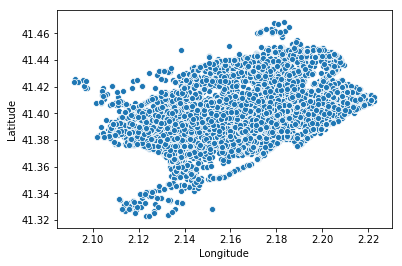

In [56]:
# scatterplot of points
#lat = x
#long = y
ax = sns.scatterplot(title'x='Longitude',y='Latitude',data=acc)


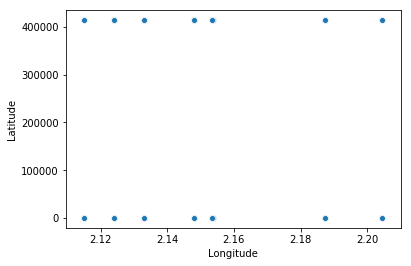

In [57]:
ax = sns.scatterplot(x='Longitude',y='Latitude',data=AQ)


Barcelona - Observ Fabra --> some observatory in a benedictine temple???

Barcelona - Poblenou --> Sants Marti

Barcelona - Sants --> Sants Monjuic

Barcelona - Eixample --> Eixample

Barcelona - Gracia --> Gracia

Barcelona - Vall Hebron --> La Val D'Hebron

Barcelona - Eixample --> Eixample

Barcelona - Ciutadella  --> Ciuta Della

Barcelona - Palau Reial --> Les Corts

In [58]:
AQ[0:10]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
6,Barcelona - Poblenou,Good,2.2045,41.4039,NaN,NaN,NaN,23h,Good,86.0,23h,Good,32.0,01/11/2018 0:00,1541027104
7,Barcelona - Observ Fabra,Good,2.1239,41.4183,23h,Good,58.0,23h,Good,3.0,23h,Good,25.0,01/11/2018 0:00,1541027104
8,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,62.0,NaN,NaN,NaN,01/11/2018 1:00,1541030725
9,Barcelona - Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,1541030725


In [59]:
#print(loc.raw["address"]["city_district"])

# Unemployment

In [60]:
unemployment = pd.read_csv('barcelona-data-sets/unemployment.csv')

In [61]:
unemployment['District Name'].value_counts()

Nou Barris             2496
Horta-Guinardó         2112
Sant Martí             1920
Sants-Montjuïc         1536
Sant Andreu            1344
Sarrià-Sant Gervasi    1152
Eixample               1152
Gràcia                  960
Ciutat Vella            768
Les Corts               576
No consta               192
Name: District Name, dtype: int64

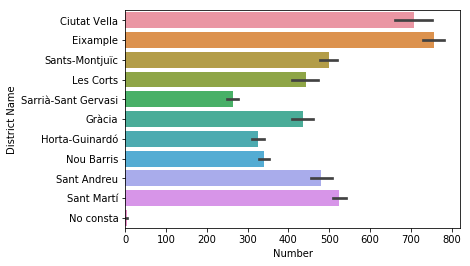

In [62]:
ax = sns.barplot(x="Number", y="District Name", data=unemployment)

In [63]:
unemployment.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


In [64]:
unemployment['Demand_occupation'].value_counts()

Registered unemployed    8880
Unemployment demand      5328
Name: Demand_occupation, dtype: int64

In [65]:
unemployment.loc[unemployment['Demand_occupation'] == 'Registered unemployed']

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630
5,2017,January,2,Eixample,6,la Sagrada Família,Male,Registered unemployed,1032
6,2017,January,2,Eixample,7,la Dreta de l'Eixample,Male,Registered unemployed,655
7,2017,January,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,Registered unemployed,751
8,2017,January,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,Registered unemployed,1128
9,2017,January,2,Eixample,10,Sant Antoni,Male,Registered unemployed,847


In [66]:
unemployment['Month'].value_counts()

June         1184
July         1184
January      1184
March        1184
September    1184
October      1184
November     1184
May          1184
August       1184
February     1184
April        1184
December     1184
Name: Month, dtype: int64

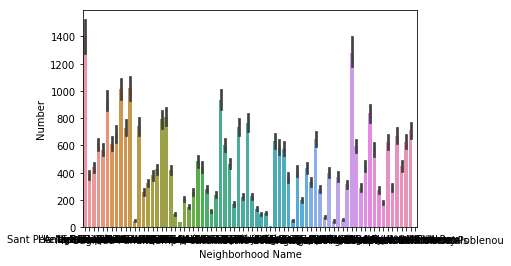

In [67]:
ax = sns.barplot(x="Neighborhood Name", y="Number", data=unemployment)

In [68]:
unemployment['Neighborhood Name']
#conclusion - too many neighbor hood name, must do by district

0                                            el Raval
1                                      el Barri Gòtic
2                                      la Barceloneta
3               Sant Pere, Santa Caterina i la Ribera
4                                       el Fort Pienc
5                                  la Sagrada Família
6                              la Dreta de l'Eixample
7                     l'Antiga Esquerra de l'Eixample
8                      la Nova Esquerra de l'Eixample
9                                         Sant Antoni
10                                       el Poble Sec
11                         la Marina del Prat Vermell
12                                  la Marina de Port
13                              la Font de la Guatlla
14                                        Hostafrancs
15                                         la Bordeta
16                                      Sants - Badal
17                                              Sants
18                          

In [69]:
acc['District Name'].value_counts()


Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

In [70]:
unemployment['District Name'].value_counts()


Nou Barris             2496
Horta-Guinardó         2112
Sant Martí             1920
Sants-Montjuïc         1536
Sant Andreu            1344
Sarrià-Sant Gervasi    1152
Eixample               1152
Gràcia                  960
Ciutat Vella            768
Les Corts               576
No consta               192
Name: District Name, dtype: int64

 we have 10 similar districts: 
 Ciutat Vella', 
'Eixample', 
'Gràcia',
'Horta-Guinardó', 
'Les Corts', 
'Nou Barris',
'Sant Andreu', 
'Sant Martí',
Sants-Montjuic,
'Sarrià-Sant Gervasi, 
(no consta = does not include = acc[unknow]


# Mapping to city district with latitude longitude

In [71]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.reverse("41.416365,2.185272") #(latitude, longitude) from unemployment or accidents
print(loc.raw)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


{'place_id': 250285559, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 662895804, 'lat': '41.4163216', 'lon': '2.18524439166667', 'display_name': '323, Carrer de Las Navas de Tolosa, Navas, Sant Martí, Barcelona, BCN, CAT, 08026, España', 'address': {'house_number': '323', 'road': 'Carrer de Las Navas de Tolosa', 'neighbourhood': 'Navas', 'suburb': 'Navas', 'city_district': 'Sant Martí', 'city': 'Barcelona', 'county': 'BCN', 'state': 'CAT', 'postcode': '08026', 'country': 'España', 'country_code': 'es'}, 'boundingbox': ['41.4162229', '41.4164105', '2.1851207', '2.1853295']}


In [72]:
render_json(loc)

{
  "place_id": 250285559,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 662895804,
  "lat": "41.4163216",
  "lon": "2.18524439166667",
  "display_name": "323, Carrer de Las Navas de Tolosa, Navas, Sant Mart\u00ed, Barcelona, BCN, CAT, 08026, Espa\u00f1a",
  "address": {
    "house_number": "323",
    "road": "Carrer de Las Navas de Tolosa",
    "neighbourhood": "Navas",
    "suburb": "Navas",
    "city_district": "Sant Mart\u00ed",
    "city": "Barcelona",
    "county": "BCN",
    "state": "CAT",
    "postcode": "08026",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.4162229",
    "41.4164105",
    "2.1851207",
    "2.1853295"
  ]
}


In [73]:
d = []

In [74]:
for index, row in AQ.iterrows():
    #print(row['Latitude'], row['Longitude'])
    geolocator = Nominatim()
    loc = geolocator.reverse(row['Latitude'],row['Longitude']) #(latitude, longitude)
    render_json(loc)
    print(loc.raw["address"])
#loop through each long,lat pair 
#find district name with geolocator
#append to dictionary
#find how many districts


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

KeyboardInterrupt: 

# Population

In [ ]:
pop = pd.read_csv('barcelona-data-sets/population.csv')

In [ ]:
pop.loc[(pop['District.Name'] == 'Eixample')& (pop['Year'] == 2017)] 
# 1152 rows 
# can use this to derive # of teen drivers

In [ ]:
pop['Age'].value_counts()

In [ ]:
pop.loc[pop['District.Name'] == 'Eixample'].loc[pop['Year']== 2017]

# how to correlate features
Same District
Same date (at the very least) 
- unemployment is only by year and month
- air quality is only by m/d/y 
- # accidents is by m d no year (year is ONLY 2017) 
- aq and acc can be ampped by district and time


# Eixample Only Dataset

In [ ]:
acc.loc[acc['District Name'] == 'Eixample' ]

In [ ]:
AQ.loc[AQ['Station'] == 'Barcelona - Eixample']

In [ ]:
AQ['Generated'].value_counts()

In [ ]:
unemployment.loc[unemployment['District Name'] == 'Eixample']

# Weather

In [280]:
weather = pd.read_csv('data/weather_2017.csv')

In [281]:
weather.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday
0,12:00 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
1,12:30 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
2,1:00 AM,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1/1,1
3,1:30 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
4,2:00 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1/1,1


In [282]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17625 entries, 0 to 17624
Data columns (total 10 columns):
Time             17624 non-null object
Temperature      17624 non-null object
Dew Point        17624 non-null object
Humidity         17624 non-null object
Wind             17623 non-null object
Wind Speed       17624 non-null object
Wind Gust        17624 non-null object
Pressure         17624 non-null object
Date             17625 non-null object
State Holiday    17625 non-null int64
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [283]:
def convert_military_time(date):
    date = str(date)
    if date == 'nan':
        return 
    #print(date)
    #24:00:00 can't exist 
    tokens = date.split(" ")
    if tokens[1] == 'AM' and (tokens[0])[0:2] =='12':
        return "00:00:00"
    elif tokens[1] == 'AM':
        #sometthing wrong w this 
        d = tokens[0].split(':')
        return (d[0])+":" +d[1]+":00"
    elif tokens[1] == 'PM' and (tokens[0])[0:2] == '12':
        return "12:00:00"
    else:
        d = tokens[0].split(":")
        
        return str(int(d[0])+12)+":00:00"


In [287]:
weather['Time'].value_counts(ascending=True)

1:44:00       1
10:19:00      1
5:16:00       1
9:44:00       1
10:08:00      1
4:23:00       1
3:42:00       1
7:18:00       1
5:39:00       1
10:38:00      1
11:15:00      1
3:14:00       1
11:34:00      1
10:48:00      1
1:52:00       1
3:09:00       1
4:44:00       1
10:28:00      1
1:19:00       1
5:36:00       1
2:53:00       1
11:44:00      1
5:06:00       1
3:13:00       1
2:06:00       1
7:21:00       1
11:45:00      1
11:47:00      1
11:06:00      1
1:15:00       1
           ... 
11:00:00    364
8:00:00     364
2:30:00     364
7:30:00     364
10:00:00    364
4:30:00     364
1:30:00     364
11:30:00    364
10:30:00    364
2:00:00     364
7:00:00     364
9:30:00     365
5:30:00     365
6:00:00     365
9:00:00     365
8:30:00     365
6:30:00     365
15:00:00    730
14:00:00    731
13:00:00    732
22:00:00    732
16:00:00    733
21:00:00    733
20:00:00    735
19:00:00    737
12:00:00    738
00:00:00    739
17:00:00    741
18:00:00    741
23:00:00    745
Name: Time, Length: 82, 

In [294]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17625 entries, 0 to 17624
Data columns (total 10 columns):
Time             17624 non-null object
Temperature      17624 non-null object
Dew Point        17624 non-null object
Humidity         17624 non-null object
Wind             17623 non-null object
Wind Speed       17624 non-null object
Wind Gust        17624 non-null object
Pressure         17624 non-null object
Date             17625 non-null object
State Holiday    17625 non-null int64
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [285]:
weather['Time'] = weather['Time'].apply(convert_military_time)

In [288]:
weather.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday
0,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
1,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
2,1:00:00,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1/1,1
3,1:30:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
4,2:00:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1/1,1


In [289]:
def dashes(date):
    date = str(date)
    if date == 'nan':
        return
    tokens = date.split("/")
    return tokens[0]+"-"+tokens[1]

In [290]:
weather['Date'] = weather['Date'].apply(dashes)

In [291]:
weather.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday
0,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1
1,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1
2,1:00:00,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1-1,1
3,1:30:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1
4,2:00:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1-1,1


In [295]:
weather.dropna(inplace=True)

In [296]:
# Making a datetime
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 
weather['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  weather['Date'].astype(str)+ ' ' +
                                  weather['Time'].astype(str)))

In [297]:
weather.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday,Datetime
0,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1,2017-01-01 00:00:00
1,00:00:00,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1,2017-01-01 00:00:00
2,1:00:00,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1-1,1,2017-01-01 01:00:00
3,1:30:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1-1,1,2017-01-01 01:30:00
4,2:00:00,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1-1,1,2017-01-01 02:00:00


In [298]:
weather.drop(columns=['Date','Time'],inplace=True)

In [299]:
weather.head()

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday,Datetime
0,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 00:00:00
1,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 00:00:00
2,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1,2017-01-01 01:00:00
3,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 01:30:00
4,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 02:00:00


In [300]:
#weather.to_csv('weather_datetime.csv')

In [334]:
#make hours unique (CAN DO MEAN OF HOUR LATER )
weather.drop_duplicates(subset='Datetime',keep='first', inplace=True)

In [335]:
weather['Datetime'].value_counts()

2017-09-18 20:00:00    1
2017-07-26 10:00:00    1
2017-12-05 05:00:00    1
2017-11-16 15:00:00    1
2017-04-22 03:00:00    1
2017-11-02 13:00:00    1
2017-01-12 08:30:00    1
2017-08-09 02:00:00    1
2017-01-16 20:00:00    1
2017-11-30 01:30:00    1
2017-05-10 01:00:00    1
2017-01-30 06:30:00    1
2017-10-17 06:30:00    1
2017-01-12 06:00:00    1
2017-05-23 11:30:00    1
2017-05-27 23:00:00    1
2017-02-17 04:30:00    1
2017-10-01 03:00:00    1
2017-09-18 04:00:00    1
2017-06-10 09:30:00    1
2017-06-14 21:00:00    1
2017-03-07 02:30:00    1
2017-10-06 02:00:00    1
2017-11-12 03:30:00    1
2017-11-11 12:00:00    1
2017-07-02 19:00:00    1
2017-04-04 05:00:00    1
2017-01-22 13:00:00    1
2017-05-11 06:30:00    1
2017-03-15 06:00:00    1
                      ..
2017-07-30 18:00:00    1
2017-06-13 02:30:00    1
2017-01-12 05:00:00    1
2017-06-22 01:30:00    1
2017-11-01 16:00:00    1
2017-03-24 11:30:00    1
2017-04-07 14:00:00    1
2017-10-08 07:00:00    1
2017-08-17 06:30:00    1


In [336]:
#weather.to_csv('weather_uni.csv')

# Making Training/Testing Set

In [109]:
acc = pd.read_csv('unique.csv')

In [110]:
acc.head()

,Unnamed: 0,Datetime,Id,District Name,Weekday,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime.1
0,3087,2017-01-01 02:00:00,2017S000002,Eixample,Sunday,Night,1,0,1,2,2.182376,41.399680,2017-01-01 02:00:00
1,872,2017-01-01 04:00:00,2017S000001,Sarrià-Sant Gervasi,Sunday,Night,1,0,1,1,2.151330,41.400771,2017-01-01 04:00:00
2,4930,2017-01-01 06:00:00,2017S000003,Horta-Guinardó,Sunday,Morning,0,0,0,1,2.166464,41.412769,2017-01-01 06:00:00
3,1585,2017-01-01 07:00:00,2017S000004,Eixample,Sunday,Morning,1,0,1,2,2.157359,41.393310,2017-01-01 07:00:00
4,322,2017-01-01 10:00:00,2017S000008,Eixample,Sunday,Morning,2,0,2,2,2.166376,41.393276,2017-01-01 10:00:00


In [ ]:
# drop duplicates 
#acc.drop_duplicates(subset='Datetime',keep='first', inplace=True)
#acc.to_csv('unique.csv')
#print(acc)

In [142]:
old = pd.read_csv('barcelona-data-sets/acc_datetime.csv')

In [146]:
old.sort_values(by=['Datetime'],inplace=True)

In [148]:
#old['Datetime'].value_counts(sort=True)

2017-10-31 14:00:00    9
2017-01-17 12:00:00    8
2017-10-23 18:00:00    8
2017-05-19 20:00:00    8
2017-06-13 18:00:00    8
2017-03-23 08:00:00    8
2017-06-26 16:00:00    8
2017-09-22 15:00:00    8
2017-01-13 14:00:00    8
2017-05-15 16:00:00    7
2017-07-05 17:00:00    7
2017-02-14 08:00:00    7
2017-09-12 09:00:00    7
2017-07-28 18:00:00    7
2017-11-22 08:00:00    7
2017-01-14 14:00:00    7
2017-07-13 14:00:00    7
2017-11-07 14:00:00    7
2017-05-31 09:00:00    7
2017-07-05 16:00:00    7
2017-12-19 13:00:00    7
2017-11-24 09:00:00    7
2017-03-20 09:00:00    7
2017-06-06 16:00:00    7
2017-07-07 13:00:00    7
2017-04-21 15:00:00    7
2017-05-04 10:00:00    7
2017-06-30 17:00:00    7
2017-10-11 08:00:00    7
2017-03-20 19:00:00    7
                      ..
2017-03-26 14:00:00    1
2017-11-11 11:00:00    1
2017-09-11 00:00:00    1
2017-12-30 21:00:00    1
2017-08-08 15:00:00    1
2017-09-09 07:00:00    1
2017-02-09 13:00:00    1
2017-09-26 10:00:00    1
2017-04-13 05:00:00    1


In [ ]:
# https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
# Makes Datetime unique and adds column for count (ie # accidents) 

#Make counts of # of accidents
#value_counts = acc['Datetime'].value_counts(dropna=True, sort=True)

#df = value_counts.rename_axis('Datetime').to_frame('counts')
#df.to_csv('barc_counts.csv')
#print (df)

In [ ]:
# Merge unique.csv and counts.csv


In [137]:
counts = pd.read_csv('barc_counts.csv')

In [138]:
uni = pd.read_csv('cleaner_unique.csv')

In [139]:
f = uni.merge(counts, how='left', on='Datetime')

In [141]:
f.to_csv('count_final.csv')

In [140]:
f.head()

,Unnamed: 0,Datetime,Weekday,Part of the day,counts
0,0,2017-01-01 02:00:00,Sunday,Night,1
1,1,2017-01-01 04:00:00,Sunday,Night,1
2,2,2017-01-01 06:00:00,Sunday,Morning,1
3,3,2017-01-01 07:00:00,Sunday,Morning,2
4,4,2017-01-01 10:00:00,Sunday,Morning,2


In [128]:
#uni.drop(columns=["Unnamed: 0","Datetime.1","Id","District Name", "Mild injuries","Serious injuries" ,"Victims",
 #                 "Vehicles involved", "Longitude", "Latitude"], inplace=True)

In [150]:
#double chck to see that merging was right
#f.loc[f['Datetime'] == '2017-01-17 12:00:00']


,Unnamed: 0,Datetime,Weekday,Part of the day,counts
216,216,2017-01-17 12:00:00,Tuesday,Morning,8


In [151]:
df = pd.read_csv('count_final.csv')

In [152]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Weekday,Part of the day,counts
0,0,0,2017-01-01 02:00:00,Sunday,Night,1
1,1,1,2017-01-01 04:00:00,Sunday,Night,1
2,2,2,2017-01-01 06:00:00,Sunday,Morning,1
3,3,3,2017-01-01 07:00:00,Sunday,Morning,2
4,4,4,2017-01-01 10:00:00,Sunday,Morning,2


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 6 columns):
Unnamed: 0         5137 non-null int64
Unnamed: 0.1       5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
dtypes: int64(3), object(3)
memory usage: 240.9+ KB


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 4 columns):
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
dtypes: int64(1), object(3)
memory usage: 160.6+ KB


In [161]:
# Merge weather and df

,Datetime,Weekday,Part of the day,counts
0,2017-01-01 02:00:00,Sunday,Night,1
1,2017-01-01 04:00:00,Sunday,Night,1
2,2017-01-01 06:00:00,Sunday,Morning,1
3,2017-01-01 07:00:00,Sunday,Morning,2
4,2017-01-01 10:00:00,Sunday,Morning,2


In [162]:
# Merge weather and df here

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday
0,12:00 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
1,12:30 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
2,1:00 AM,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1/1,1
3,1:30 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
4,2:00 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1/1,1


In [58]:
#80 20 split

#10339 -> 
# 80% = 8271 samples
# 20% = 2068 samples


10339

In [ ]:
# doing counts per hour
# day and hour is the same


In [1]:
# time series 
# regression (mean squared)
# % that the # of accidnets will be > 5 for example 
# or greater than the mean PER district


# Merging Weather features and Accident Counts

In [339]:
wea = pd.read_csv('weather_uni.csv')

In [340]:
wea.head()

,Unnamed: 0,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday,Datetime
0,0,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 00:00:00
1,2,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1,2017-01-01 01:00:00
2,3,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 01:30:00
3,4,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 02:00:00
4,5,43 F,37 F,81 %,NW,8 mph,0 mph,30.3 in,1,2017-01-01 02:30:00


In [341]:
acc = pd.read_csv('count_final.csv')

In [342]:
acc.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Weekday,Part of the day,counts
0,0,0,2017-01-01 02:00:00,Sunday,Night,1
1,1,1,2017-01-01 04:00:00,Sunday,Night,1
2,2,2,2017-01-01 06:00:00,Sunday,Morning,1
3,3,3,2017-01-01 07:00:00,Sunday,Morning,2
4,4,4,2017-01-01 10:00:00,Sunday,Morning,2


In [343]:
acc.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
wea.drop(columns=['Unnamed: 0'])

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday,Datetime
0,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 00:00:00
1,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1,2017-01-01 01:00:00
2,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1,2017-01-01 01:30:00
3,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 02:00:00
4,43 F,37 F,81 %,NW,8 mph,0 mph,30.3 in,1,2017-01-01 02:30:00
5,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 03:00:00
6,43 F,37 F,81 %,NW,10 mph,0 mph,30.3 in,1,2017-01-01 03:30:00
7,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 04:00:00
8,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1,2017-01-01 04:30:00
9,41 F,36 F,81 %,NW,10 mph,0 mph,30.3 in,1,2017-01-01 05:00:00


In [344]:
alpha_df = acc.merge(wea, how='left', on='Datetime')

In [345]:
alpha_df.head()

,Unnamed: 0_x,Unnamed: 0.1,Datetime,Weekday,Part of the day,counts,Unnamed: 0_y,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,0,0,2017-01-01 02:00:00,Sunday,Night,1,4.0,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,1,1,2017-01-01 04:00:00,Sunday,Night,1,8.0,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2,2,2017-01-01 06:00:00,Sunday,Morning,1,12.0,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,3,3,2017-01-01 07:00:00,Sunday,Morning,2,14.0,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,4,4,2017-01-01 10:00:00,Sunday,Morning,2,20.0,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [346]:
alpha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137 entries, 0 to 5136
Data columns (total 15 columns):
Unnamed: 0_x       5137 non-null int64
Unnamed: 0.1       5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
Unnamed: 0_y       5132 non-null float64
Temperature        5132 non-null object
Dew Point          5132 non-null object
Humidity           5132 non-null object
Wind               5132 non-null object
Wind Speed         5132 non-null object
Wind Gust          5132 non-null object
Pressure           5132 non-null object
State Holiday      5132 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 642.1+ KB


In [330]:
alpha_df['Datetime'].value_counts()

2017-02-13 18:00:00    6
2017-10-18 19:00:00    5
2017-06-28 19:00:00    5
2017-04-01 17:00:00    5
2017-02-24 12:00:00    4
2017-10-19 17:00:00    4
2017-01-27 21:00:00    4
2017-01-27 12:00:00    4
2017-03-24 20:00:00    4
2017-08-31 12:00:00    4
2017-01-20 16:00:00    4
2017-01-20 23:00:00    4
2017-01-20 22:00:00    3
2017-01-27 20:00:00    3
2017-01-27 13:00:00    3
2017-06-15 22:00:00    3
2017-09-22 15:00:00    3
2017-08-01 15:00:00    3
2017-07-08 15:00:00    3
2017-01-20 12:00:00    3
2017-09-15 20:00:00    3
2017-04-05 21:00:00    3
2017-01-22 20:00:00    3
2017-03-03 23:00:00    3
2017-02-07 18:00:00    3
2017-03-24 17:00:00    3
2017-06-15 21:00:00    3
2017-03-04 00:00:00    3
2017-09-14 18:00:00    3
2017-04-26 19:00:00    3
                      ..
2017-07-14 01:00:00    1
2017-07-18 04:00:00    1
2017-11-15 10:00:00    1
2017-03-20 03:00:00    1
2017-02-26 04:00:00    1
2017-09-24 06:00:00    1
2017-01-31 11:00:00    1
2017-07-30 08:00:00    1
2017-11-19 07:00:00    1


In [333]:
alpha_df.loc[alpha_df['Datetime'] == '2017-02-13 18:00:00']


,Unnamed: 0_x,Unnamed: 0.1,Datetime,Weekday,Part of the day,counts,Unnamed: 0_y,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
1002,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2119.0,57 F,55 F,94 %,E,9 mph,0 mph,29.9 in,0.0
1003,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2120.0,57 F,55 F,94 %,E,7 mph,0 mph,29.9 in,0.0
1004,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2121.0,57 F,55 F,94 %,E,7 mph,0 mph,29.9 in,0.0
1005,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2122.0,57 F,55 F,94 %,E,6 mph,0 mph,29.9 in,0.0
1006,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2123.0,57 F,55 F,94 %,E,5 mph,0 mph,29.9 in,0.0
1007,596,596,2017-02-13 18:00:00,Monday,Afternoon,1,2124.0,57 F,55 F,94 %,E,3 mph,0 mph,29.9 in,0.0


,Unnamed: 0_x,Unnamed: 0.1,Datetime,Weekday,Part of the day,counts,Unnamed: 0_y,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,0,0,2017-01-01 02:00:00,Sunday,Night,1,4.0,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,1,1,2017-01-01 04:00:00,Sunday,Night,1,8.0,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2,2,2017-01-01 06:00:00,Sunday,Morning,1,12.0,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,3,3,2017-01-01 07:00:00,Sunday,Morning,2,14.0,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,4,4,2017-01-01 10:00:00,Sunday,Morning,2,20.0,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0
5,5,5,2017-01-01 11:00:00,Sunday,Morning,1,22.0,43 F,34 F,70 %,NNW,15 mph,0 mph,30.3 in,1.0
6,6,6,2017-01-01 12:00:00,Sunday,Morning,2,24.0,45 F,36 F,71 %,NW,10 mph,0 mph,30.3 in,1.0
7,6,6,2017-01-01 12:00:00,Sunday,Morning,2,25.0,46 F,36 F,66 %,NW,10 mph,0 mph,30.3 in,1.0
8,7,7,2017-01-01 13:00:00,Sunday,Morning,1,26.0,48 F,36 F,62 %,NW,9 mph,0 mph,30.3 in,1.0
9,7,7,2017-01-01 13:00:00,Sunday,Morning,1,27.0,48 F,37 F,66 %,NW,8 mph,0 mph,30.2 in,1.0


In [347]:
alpha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137 entries, 0 to 5136
Data columns (total 15 columns):
Unnamed: 0_x       5137 non-null int64
Unnamed: 0.1       5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
Unnamed: 0_y       5132 non-null float64
Temperature        5132 non-null object
Dew Point          5132 non-null object
Humidity           5132 non-null object
Wind               5132 non-null object
Wind Speed         5132 non-null object
Wind Gust          5132 non-null object
Pressure           5132 non-null object
State Holiday      5132 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 642.1+ KB


In [349]:
alpha_df.drop(columns=['Unnamed: 0_x','Unnamed: 0.1','Unnamed: 0_y'],inplace=True)

In [350]:
alpha_df.head()

,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [352]:
#alpha_df.to_csv('full.csv')

# Models

In [ ]:
# Random Forest
# ARIMA
# LSTM

# Evaluation

In [ ]:
#mean squared error